# Cross-frequency coupling for the practicing neuroscientist

To assess whether different frequency rhythms interact in the LFP recording, we implement a measure to calculate CFC. The idea of CFC analysis is to determine whether a relation exists between the phase of a low-frequency signal and the envelope or amplitude of a high-frequency signal. In general, computing CFC involves three steps. Each step contains important questions and encompasses entire fields of study. Our goal in this section is to move quickly forward and produce a procedure we can employ, investigate, and criticize. Continued study of CFC—and the associated nuances of each step—is an active area of ongoing research.

### CFC analysis steps

* Filter the data into high- and low-frequency bands.

* Extract the amplitude and phase from the filtered signals.

* Determine if the phase and amplitude are related.

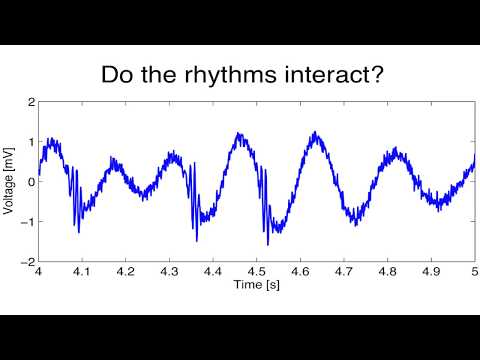

In [107]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('9YyN2pU2IVA')

## 1. Filter the Data into High- and Low-Frequency Bands.

The first step in the CFC analysis is to filter the data into two frequency bands of interest. The choice is not arbitrary: the separate frequency bands are motivated by initial spectral analysis of the LFP data. In this case, we choose the low-frequency band as 5–7 Hz, consistent with the largest peak in the spectrum, and the high-frequency band as 80–120 Hz, consistent with the second-largest broadband peak. To consider alternative frequency bands, the same analysis steps would apply.

There are many options to perform the filtering. To do so requires us to design a filter that ideally extracts the frequency bands of interest without distorting the results. Here, we apply a finite impulse response (FIR) filter. In Python,

https://stackoverflow.com/questions/16301569/bandpass-filter-in-python

http://mpastell.com/2010/01/18/fir-with-scipy/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html

http://scipy-cookbook.readthedocs.io/items/ApplyFIRFilter.html

http://scipy-cookbook.readthedocs.io/items/FIRFilter.html

In [8]:
import scipy.io as sio
mat = sio.loadmat('LFP-1.mat')      # Load the data.
t = mat['t'][0]                     # Get the time axis.
LFP = mat['LFP'][0]                 # Get the LFP data.

In [9]:
dt = t[2]-t[1];          #Define the sampling interval.
Fs = 1/dt;               #Define the sampling frequency.
fNQ = Fs/2;              #Define the Nyquist frequency.

For the **low-frequency** interval:

In [22]:
from scipy import signal
Wn = [5,7];              #...set the passband,
n = 100;                 #...and filter order,
b = signal.firwin(n,Wn, nyq=fNQ, pass_zero=False, window='hamming');          #...build bandpass filter.
Vlo = signal.filtfilt(b,1,LFP); #...and apply filter.

For the **high-frequency** interval:

In [23]:
from scipy import signal
Wn = [80,120];           #...set the passband,
n = 100;                 #...and filter order,
b = signal.firwin(n,Wn, nyq=fNQ, pass_zero=False, window='hamming');          #...build bandpass filter.
Vhi = signal.filtfilt(b,1,LFP); #...and apply filter.

For each frequency band, we specify a frequency interval of interest by defining the low- and high-cutoff frequencies in the variable `Wn`. In this way, we specify the passband of the filter. We then set the filter order (`n`) and design the filter using the Python function `signal.firwin` from the `scipy` package. Finally, we apply the filter using the Python function `signal.filtfilt`, which performs zero-phase filtering by applying the filter in both the forward and reverse directions.  We note that the filtering procedure is nearly the same in both frequency bands; the only change is the specification of the frequency interval of interest.

To understand the impact of this filtering operation on the LFP, let’s plot the results. More specifically, let's plot the original signal, and the signal filtered in the low- and high-frequency bands, for a 2 s interval of time:

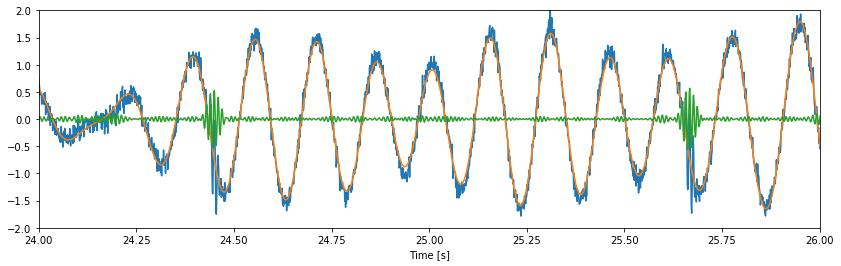

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 4))
plt.plot(t,LFP)
plt.plot(t,Vlo)
plt.plot(t,Vhi)
plt.xlabel('Time [s]')
plt.xlim([24, 26]);
plt.ylim([-2, 2]);

As expected, the low-frequency band captures the large-amplitude rhythm dominating the LFP signal, while the higher-frequency band isolates the brief bursts of faster activity.

In [13]:
from scipy.signal import fftconvolve, lfilter, firwin

n = 401
b = firwin(n, [4, 7], nyq=fNQ, pass_zero=False, window='hamming')

fir_firls = signal.firls(n, bands, desired, fs=Fs)
#print(b)
plt.plot(b)
plt.show()

NameError: name 'bands' is not defined

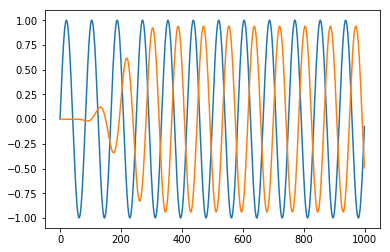

In [106]:
import numpy as np
from scipy.signal import fftconvolve, lfilter, firwin

dt = 1/500;          #Define the sampling interval.
Fs = 1/dt;               #Define the sampling frequency.
fNQ = Fs/2;              #Define the Nyquist frequency.

Wn = np.array([5,7])/fNQ;          #...set the passband,

#n = 101;                 #...and filter order,
#b = firwin(n,Wn);          #...build bandpass filter.

#plt.plot(b)
#plt.show()

m = 2000;
n = 1;
#x = np.random.random(size=(m, n))
t = np.arange(0,2,1/500)
x = np.sin(2*np.pi*t*6)
#ntaps = 200
#b = firwin(ntaps, [0.01, 0.5], width=0.05, pass_zero=False)
y = lfilter(b, [1.0], x)

plt.plot(x)
plt.plot(y)
plt.show()

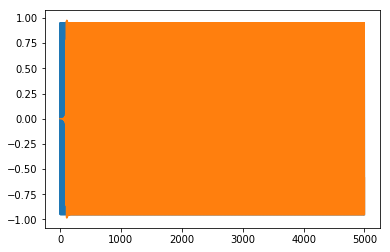

In [51]:
import matplotlib.pyplot as plt

plt.plot(x)
plt.plot(y)
plt.show()

#plt.plot([1,2,3,4])
#plt.ylabel('some numbers')
#plt.show()